In [1]:
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
from tqdm import tqdm
from utils import*
from experiments import*
from networks import*

In [2]:
mat = scipy.io.loadmat('./binaryalphadigs.mat')
arrays_list = [ lire_alpha(mat['dat'],i) for i in range(10)]
test = np.concatenate(arrays_list, axis=0)
digits_test = torch.tensor(test).float()

In [3]:
device =  torch.device('cuda')
pretraining_args = Args(
     n_steps = 200,
     gibbs = 1,
     alpha = 1e-1,
     data = digits_test,
     mode =  'full'  ,
     batch_size = 256,
)

num_classes = 10
input_size = test.shape[1]
history = {"accuracy":[], "pretrained_accuracy":[]}

In [4]:
sizes = [1000 , 5000,10000 ,20000, 30000 , 40000, 50000, 60000]
hidden_sizes = [500,500]
for i,n_train in enumerate(sizes):
    train_dataset,test_dataset = load_mnist(n_train) # first we load 2000 random digits for the training
    train_loader = DataLoader(train_dataset, batch_size=512, shuffle=True,num_workers=8,pin_memory=True)
    test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False,num_workers=8,pin_memory=True)
    training_args = Args(
     lr = 1e-3,
     n_epochs = 50,
     train_loader = train_loader,
     test_loader = test_loader,
     device = device
    )
    print("\nConfig {}".format(i+1))
    model,pretrain_model = get_config(input_size=input_size,
                                        num_classes=num_classes,
                                        layer_config=hidden_sizes,
                                     device=device)
    accuracy,pretrain_accuracy = run_experiment(model=model,
                                            pretrain_model=pretrain_model,
                                            training=training_args,
                                            pretraining=pretraining_args)
    history['accuracy'].append(accuracy)
    history['pretrained_accuracy'].append(pretrain_accuracy)


Config 1
[INFO] training model 1 from scratch


100%|██████████| 50/50 [00:31<00:00,  1.59it/s]


[INFO] Pretraining  model 2 


100%|██████████| 2/2 [02:00<00:00, 60.43s/it]


[INFO] training model 2


100%|██████████| 50/50 [00:31<00:00,  1.61it/s]

[INFO] Evaluating models 



Config 2
[INFO] training model 1 from scratch


100%|██████████| 50/50 [00:43<00:00,  1.15it/s]


[INFO] Pretraining  model 2 


100%|██████████| 2/2 [02:02<00:00, 61.49s/it]


[INFO] training model 2


100%|██████████| 50/50 [00:41<00:00,  1.21it/s]

[INFO] Evaluating models 



Config 3
[INFO] training model 1 from scratch


100%|██████████| 50/50 [00:54<00:00,  1.08s/it]


[INFO] Pretraining  model 2 


100%|██████████| 2/2 [02:03<00:00, 61.68s/it]


[INFO] training model 2


100%|██████████| 50/50 [00:55<00:00,  1.12s/it]

[INFO] Evaluating models 



Config 4
[INFO] training model 1 from scratch


100%|██████████| 50/50 [01:24<00:00,  1.68s/it]


[INFO] Pretraining  model 2 


100%|██████████| 2/2 [02:04<00:00, 62.18s/it]


[INFO] training model 2


100%|██████████| 50/50 [01:22<00:00,  1.66s/it]

[INFO] Evaluating models 



Config 5
[INFO] training model 1 from scratch


100%|██████████| 50/50 [01:51<00:00,  2.22s/it]


[INFO] Pretraining  model 2 


100%|██████████| 2/2 [02:01<00:00, 60.95s/it]


[INFO] training model 2


100%|██████████| 50/50 [01:49<00:00,  2.19s/it]

[INFO] Evaluating models 



Config 6
[INFO] training model 1 from scratch


100%|██████████| 50/50 [02:18<00:00,  2.77s/it]


[INFO] Pretraining  model 2 


100%|██████████| 2/2 [02:03<00:00, 61.98s/it]


[INFO] training model 2


100%|██████████| 50/50 [02:19<00:00,  2.78s/it]

[INFO] Evaluating models 



Config 7
[INFO] training model 1 from scratch


100%|██████████| 50/50 [02:48<00:00,  3.37s/it]


[INFO] Pretraining  model 2 


100%|██████████| 2/2 [02:03<00:00, 61.55s/it]


[INFO] training model 2


100%|██████████| 50/50 [02:46<00:00,  3.33s/it]

[INFO] Evaluating models 



Config 8
[INFO] training model 1 from scratch


100%|██████████| 50/50 [03:13<00:00,  3.88s/it]


[INFO] Pretraining  model 2 


100%|██████████| 2/2 [02:02<00:00, 61.33s/it]


[INFO] training model 2


100%|██████████| 50/50 [03:14<00:00,  3.90s/it]

[INFO] Evaluating models 


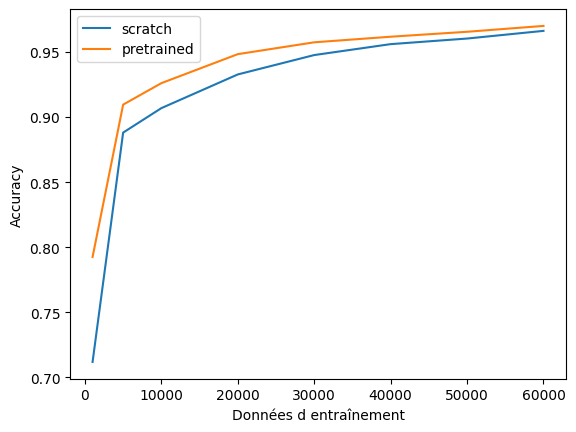

In [5]:
plt.plot(sizes,history['accuracy'],label="scratch")
plt.plot(sizes,history['pretrained_accuracy'],label="pretrained")
plt.xlabel('Données d entraînement')
plt.ylabel('Accuracy')
plt.legend()